In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [31]:
models = ["GCN", "GAT"]
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
experiments = {
    'qm9_mu': {
        "None": [0.749, 0.722],
        "SHOT": [0.685, 0.764],
        "ROPS": [0.672, 0.686],

    },
    'qm9_cv': {
        "None": [1.327, 1.242],
        "SHOT": [1.222, 1.163],
        "ROPS": [1.251, 1.12]
    }
}

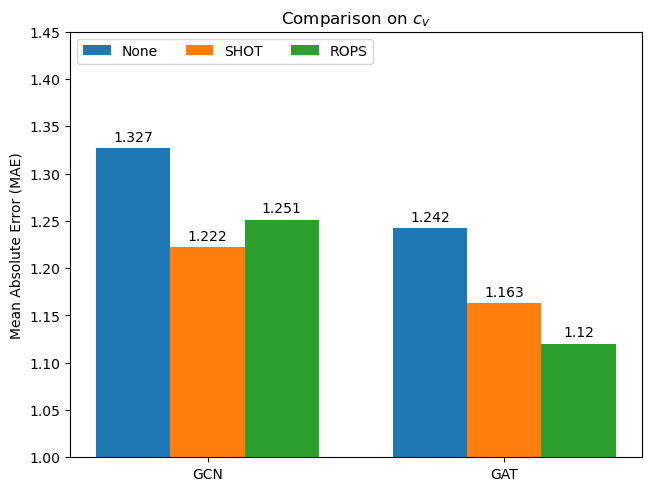

In [36]:
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for k, v in experiments['qm9_cv'].items():
    offset = width * multiplier
    rects = ax.bar(x + offset, v, width, label=k)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('Comparison on $c_v$')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(1.0, 1.45)
plt.savefig("test_cv.png")

plt.show()

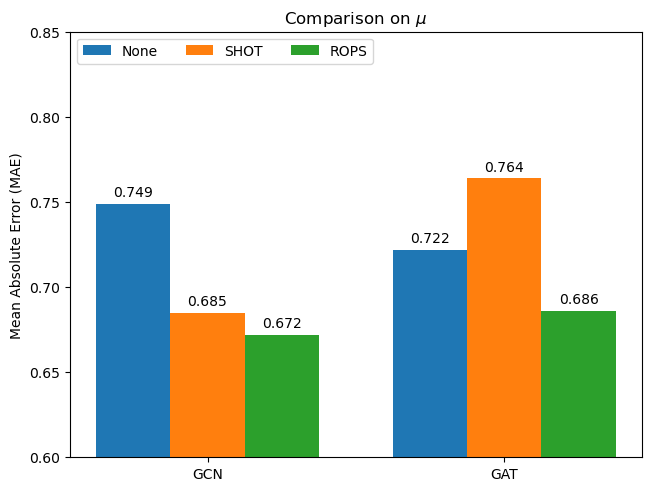

In [37]:
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for k, v in experiments['qm9_mu'].items():
    offset = width * multiplier
    rects = ax.bar(x + offset, v, width, label=k)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('Comparison on $\mu$')
ax.set_xticks(x + width, models)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0.6, 0.85)
plt.savefig("test_mu.png")
plt.show()

In [49]:
val_mu = {}
for fname in os.listdir("mu"):
    if not fname.endswith(".csv"):
        continue
    
    fname_attr = fname[4:].split("_")
    exp_name = fname_attr[0] + "_" + fname_attr[1]
    df = pd.read_csv("mu/" + fname, usecols=["Step", "Value"])
    val_mu[exp_name] = df

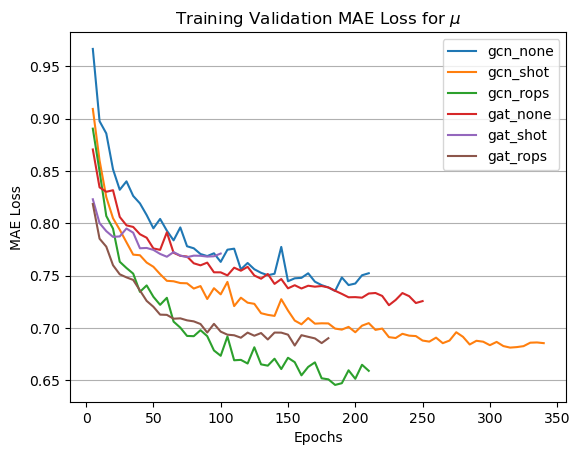

In [50]:
fig = plt.figure()
for i in ["gcn_none", "gcn_shot", "gcn_rops", "gat_none", "gat_shot", "gat_rops"]:
    df = val_mu[i]
    plt.plot(df["Step"] / 358, df["Value"], label=i)

plt.title("Training Validation MAE Loss for $\mu$")
plt.xlabel("Epochs")
plt.ylabel("MAE Loss")
plt.grid(axis="y")
plt.legend()
plt.savefig("val_loss_mu.png")


In [51]:
val_cv = {}
for fname in os.listdir("cv"):
    if not fname.endswith(".csv"):
        continue
    
    fname_attr = fname[4:].split("_")
    exp_name = fname_attr[0] + "_" + fname_attr[1]
    df = pd.read_csv("cv/" + fname, usecols=["Step", "Value"])
    val_cv[exp_name] = df

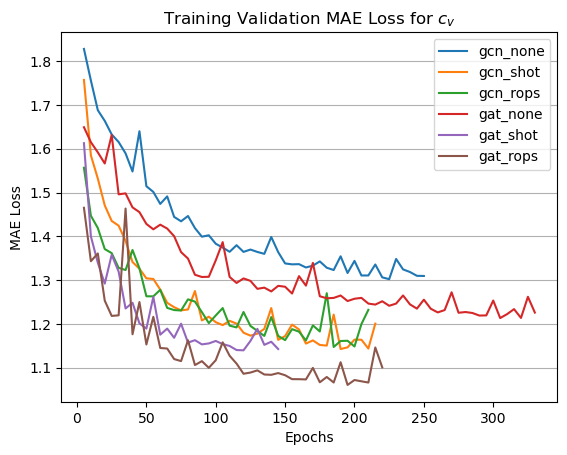

In [52]:
fig = plt.figure()
for i in ["gcn_none", "gcn_shot", "gcn_rops", "gat_none", "gat_shot", "gat_rops"]:
    df = val_cv[i]
    plt.plot(df["Step"] / 358, df["Value"], label=i)

plt.title("Training Validation MAE Loss for $c_v$")
plt.xlabel("Epochs")
plt.ylabel("MAE Loss")
plt.grid(axis="y")
plt.legend()
plt.savefig("val_loss_cv.png")


In [55]:
k_vals = [3, 5, 7]
shot = [0.683, 0.688, 0.717]
rops = [0.675, 0.630, 0.742]

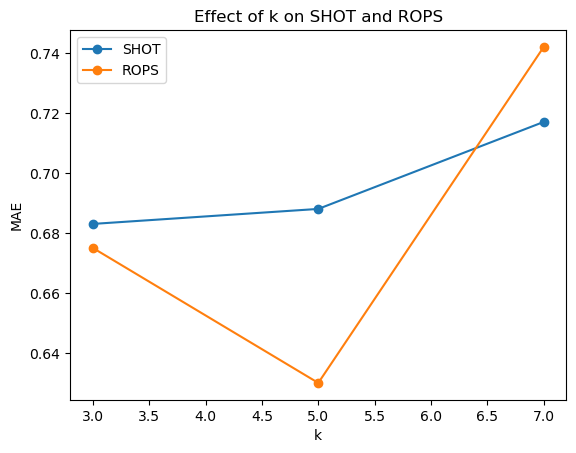

In [61]:
plt.figure()
plt.plot(k_vals, shot, marker="o", label=f"SHOT")
plt.plot(k_vals, rops, marker="o", label=f"ROPS")
plt.legend()
plt.xlabel("k")
plt.ylabel("MAE")
plt.title("Effect of k on SHOT and ROPS")
plt.savefig("k_effect.png")